# Glacier Meltwater Runoff model
This notebook walks through modelling how meltwater will flow over a glacier and how it will change with different meltwater production.

### Imports

In [1]:
from landlab.components import (
    FlowDirectorD8,
    FlowDirectorMFD,
    FlowDirectorSteepest,
    FlowAccumulator, 
    SinkFillerBarnes,
    DepressionFinderAndRouter
)

from bmi_topography import Topography
from landlab import RasterModelGrid
from landlab.plot.drainage_plot import drainage_plot
from landlab.plot.graph import plot_graph
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import scipy.io
from scipy.ndimage import gaussian_filter

from GlacierSurfaceFlow import GlacierSurfaceFlow
from plotting import flowdir_plot

## Plot synthetic glacier surfaces

In [ ]:
NyeDome = GlacierSurfaceFlow('Nye Dome')
NyeDome.surf_plot()

In [ ]:
channel = GlacierSurfaceFlow('Channel')
channel.surf_plot()

In [ ]:
parabola = GlacierSurfaceFlow('Parabola')
parabola.surf_plot()

## Running flow accumulator on channel synthetic glacier

#### Instantiating class and plotting surface elevation

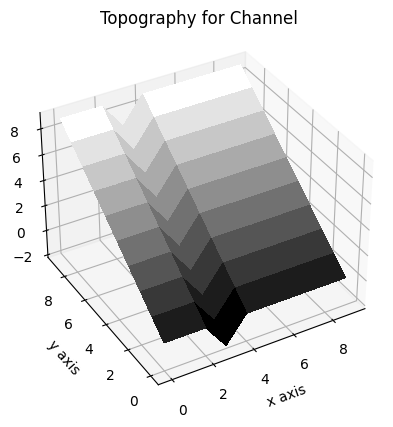

In [2]:
channel = GlacierSurfaceFlow('Channel')
channel.create_flow_acc()
channel.surf_plot()

#### Plotting drainage area

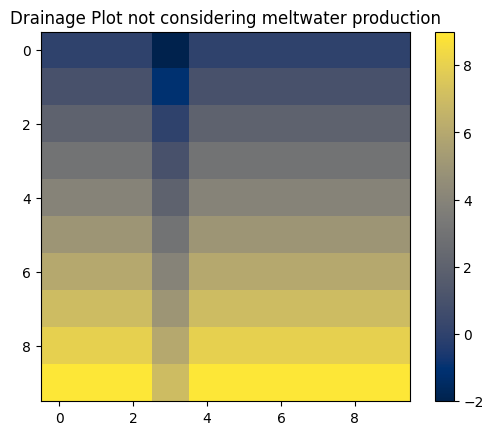

In [124]:
flowdir_plot(channel.grid,1,title='Drainage Plot not considering meltwater production')
plt.show()

#### Incorporating heterogeneous melt production

In [6]:
runoff_rate = np.ones_like(channel.grid.at_node['water__unit_flux_in']) * 10
runoff_rate[(channel.grid.y_of_node==7) & (channel.grid.x_of_node==7)] = 100
channel.grid.at_node['water__unit_flux_in'] = runoff_rate

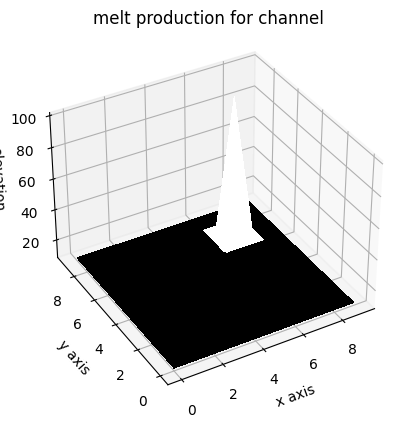

In [7]:
#channel.grid.at_node.keys()
channel.surf_plot(surface='water__unit_flux_in',title='melt production for channel')

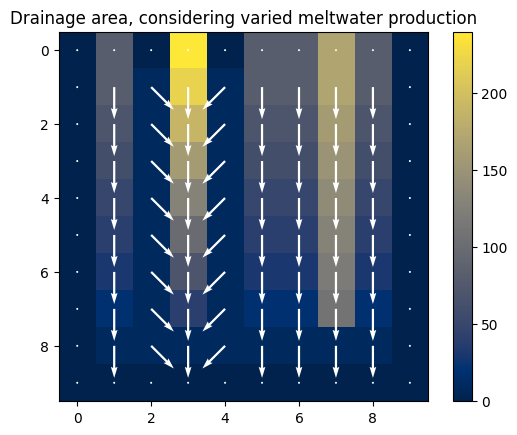

In [11]:
channel.create_flow_acc(runoff_rate = runoff_rate)
flowdir_plot(channel.grid,1,surface='surface_water__discharge',title='Drainage area, considering varied meltwater production')
plt.show()

## Running flow accumulator on Andes DEM

#### Instantiating class and plotting surface elevation

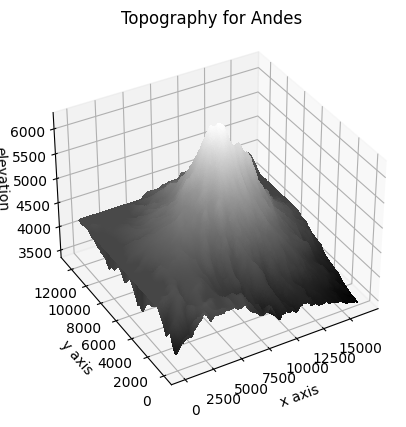

In [2]:
andes = GlacierSurfaceFlow('Andes')
andes.create_flow_acc()
andes.surf_plot()

#### Plotting drainage area

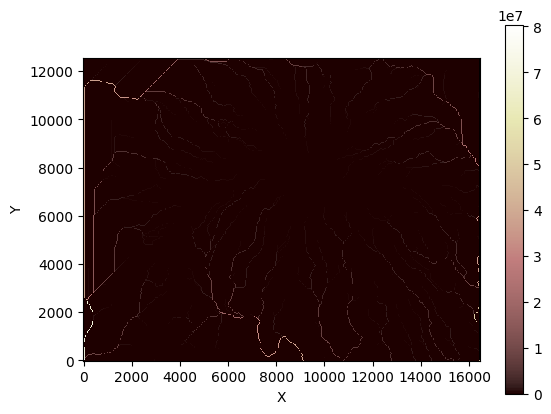

In [14]:
andes.grid.imshow('surface_water__discharge')

In [30]:
def flowdir_plot(mg,quiver_d=2,surface='topographic__elevation',surf_cmap='cividis',quiver_c = 'white',title='Drainage Plot'):
    ''' Graph of Flow direction on topography '''
    #set base parameters:
    fig,ax = plt.subplots(1,1)
    nx,ny = mg.number_of_node_rows, mg.number_of_node_columns
    
    #create 2D numpy arrays:
    node_grid = np.reshape(np.arange(0,len(mg.at_node[surface])),(nx,ny)) #array of node numbers
    receiver_grid = np.reshape(mg.at_node['flow__receiver_node'],(nx,ny)) #array of number of node receiving flow
    grid = np.reshape(mg.at_node[surface],(nx,ny)) #topography array
    
    #find coordinates for quivers to be made:
    #quiver_x = [int(i) for i in mg.node_x if i%quiver_d==0 ]
    #quiver_y = [int(i) for i in mg.node_y if i%quiver_d==0 ]
    
    #quiver_coords = list(zip(quiver_y,quiver_x))
    
    quiver_coords = []
    quiver_x = []
    quiver_y = []
    for i in range(0,len(mg.node_x)):
        x = int(mg.node_x[i]/mg.spacing[0])
        y = int(mg.node_y[i]/mg.spacing[1])
        if (x+y)%2 == 0:
            quiver_coords.append((y,x))
            quiver_x.append(x)
            quiver_y.append(y)
    
    
    x_dir = []
    y_dir = []
    n=0
    for q in quiver_coords:
        n+=1
        if n%10000 == 0:
            print(n)
        #q_x_idx = int(q[0]/30)
        #q_y_idx = int(q[1]/30)
        #q_idx = (q_x_idx,q_y_idx)
        q_idx = q
        y,x = np.where(node_grid == receiver_grid[q_idx])[0][0], np.where(node_grid == receiver_grid[q_idx])[1][0]
        #create unit vector:
        x_vector = x-q_idx[1]
        y_vector = y-q_idx[0]
        length = np.sqrt((x_vector**2) + (y_vector**2))
        
        if length != 0:
            x_dir.append(x_vector/length)
            y_dir.append(y_vector/length)
        else:
            x_dir.append(0)
            y_dir.append(0)
    #plotting:
    ax1 = ax.imshow(grid,cmap=surf_cmap,label=surface)
    ax.quiver(quiver_x,quiver_y,1000*x_dir,1000*y_dir,color=quiver_c)
    ax.set_title(title)
    fig.colorbar(ax1,ax=ax)
    
    return fig,ax

In [ ]:
flowdir_plot(andes.grid,100000)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


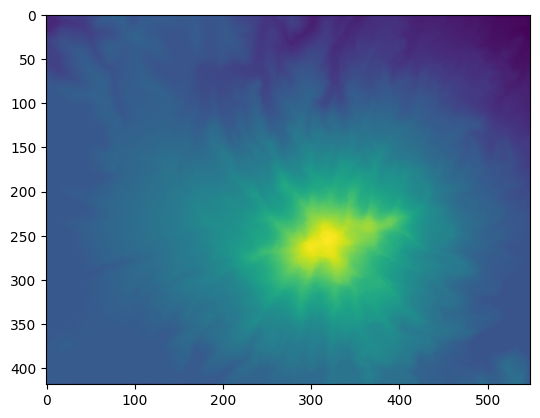

In [129]:
fig,ax=plt.subplots()
ax.imshow(np.reshape(andes.grid.at_node['topographic__elevation'], (ny,nx)))

(0, 0)
(0, 300)
(0, 600)


IndexError: index 600 is out of bounds for axis 1 with size 419

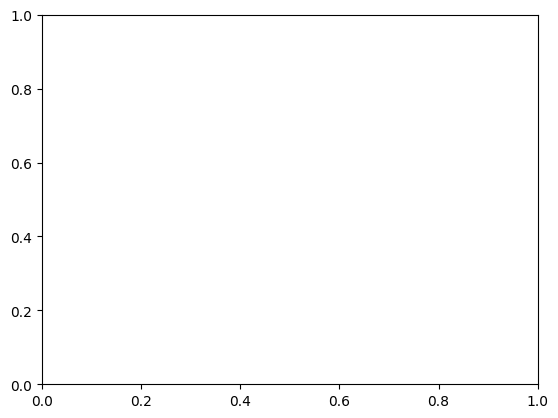

In [30]:
fig,ax=plt.subplots(1,1)
ny,nx = andes.grid.number_of_node_rows,andes.grid.number_of_node_columns
node_grid = np.reshape(np.arange(0,len(andes.grid.at_node['topographic__elevation'])),(nx,ny))
receiver_grid = np.reshape(andes.grid.at_node['flow__receiver_node'],(nx,ny))
grid = np.reshape(andes.grid.at_node['topographic__elevation'],(nx,ny))
quiver_x = [int(i) for i in andes.grid.node_x if i%100==0 ]
quiver_y = [int(i) for i in andes.grid.node_y if i%100==0 ]
quiver_coords = list(zip(quiver_y,quiver_x))
x_dir = []
y_dir = []

for q in quiver_coords:
    print(q)
    if(q < 
    y,x = np.where(node_grid == receiver_grid[q])[0][0], np.where(node_grid == receiver_grid[q])[1][0]
    #create unit vector:
    x_vector = x-q[1]
    y_vector = y-q[0]
    length = np.sqrt((x_vector**2) + (y_vector**2))
        
    if length != 0:
        x_dir.append(x_vector/length)
        y_dir.append(y_vector/length)
    else:
        x_dir.append(0)
        y_dir.append(0)

IndexError: index 420 is out of bounds for axis 1 with size 419

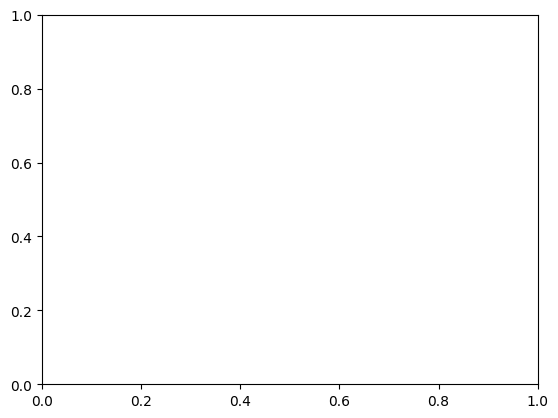

In [15]:
flowdir_plot(andes.grid,quiver_d=10,title='Drainage Plot not considering melt prod.')
plt.show()

#### Incorporating heterogeneous melt production

In [ ]:
snowmelt = xr.open_dataset('andes_ERA5_data.nc').smlt.mean(dim=['time'])
runoff_rate = andes.grid.add_ones('water__unit_flux_in',at='node',clobber=True)

runoff_rate[(andes.grid.y_of_node >= andes.grid.y_of_node.max()/2) & (andes.grid.x_of_node >= andes.grid.x_of_node.max()/2)] = snowmelt[1][1]
runoff_rate[(andes.grid.y_of_node >= andes.grid.y_of_node.max()/2) & (andes.grid.x_of_node < andes.grid.x_of_node.max()/2)] = snowmelt[1][0]
runoff_rate[(andes.grid.y_of_node < andes.grid.y_of_node.max()/2) & (andes.grid.x_of_node >= andes.grid.x_of_node.max()/2)] = snowmelt[0][1]
runoff_rate[(andes.grid.y_of_node < andes.grid.y_of_node.max()/2) & (andes.grid.x_of_node < andes.grid.x_of_node.max()/2)] = snowmelt[0][0]

runoff_rate = gaussian_filter(andes.grid.at_node['water__unit_flux_in'].reshape(andes.grid.shape),100)
andes.grid.at_node['water__unit_flux_in'] = runoff_rate.reshape(andes.grid.shape)
#np.flip(runoff_rate,axis=1)

In [ ]:
andes.surf_plot(surface='water__unit_flux_in',title = '2022 melt production for the Andes (mm w.e.)')

In [ ]:
andes.create_flow_acc(runoff_rate = runoff_rate)
drainage_plot(andes.grid,surface='surface_water__discharge',title='Drainage Plot considering melt prod.')
plt.show()